In [ ]:
#import the libraries

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [148]:
#The DATA

In [149]:
train = pd.read_csv('titanic_train.csv')

In [150]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
print(train.info())  #missing data - Age, cabin, embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [152]:
print(train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [153]:
#missing data

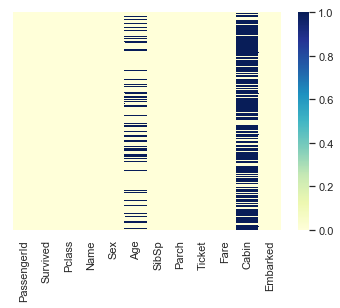

In [154]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='YlGnBu')

In [155]:
# A lot of data is missing in Cabin section and it might be a factor to define the person "Survived or Not" 
# but as for now I am dropping the column or can change it to 0 or 1 for Known or Unknown Cabin.

In [156]:
train.drop('Cabin',axis=1,inplace=True)

In [157]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [158]:
# Now for the Age

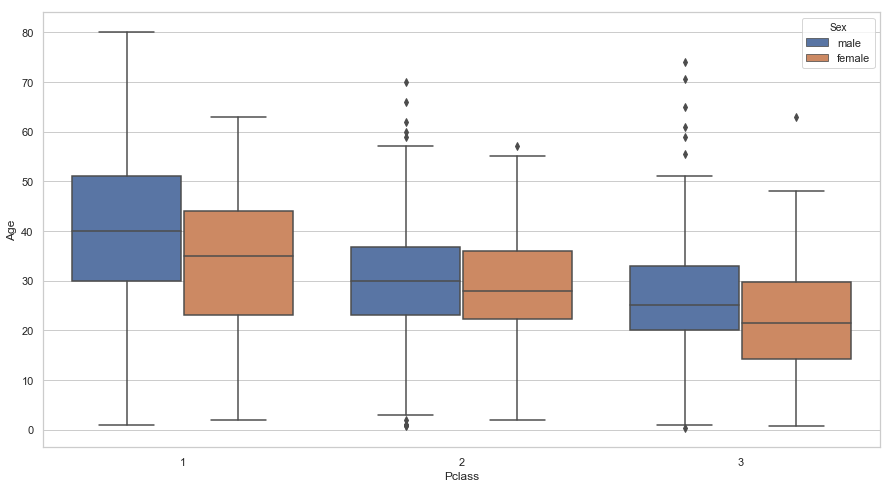

In [159]:
plt.figure(figsize=(15,8))
sns.set(style='whitegrid')
sns.boxplot(x='Pclass',y='Age',data=train,hue='Sex')

In [160]:
# Defining a function to fill out the missing values in Age Column

In [161]:
def change_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    if pd.isnull(Age):

        if Pclass == 1 and Sex == 'male':
            return 40
        elif Pclass == 1 and Sex == 'female':
            return 35

        elif Pclass == 2 and Sex == 'male':
            return 30
        elif Pclass == 2 and Sex == 'female':
            return 28

        elif Pclass == 3 and Sex=='male':
            return 25
        else:
            return 22

    else:
        return Age

In [162]:
# Now apply the function

In [163]:
train['Age'] = train[['Age','Pclass','Sex']].apply(change_age,axis=1)

In [164]:
# Lets take a look at heat map again for NA values in Age

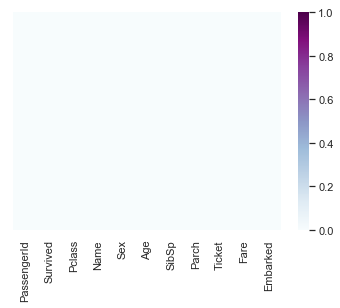

In [165]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='BuPu')

In [166]:
# We still have 2 NA values in Embarked Column and I am dropping those 2 rows as it will not affect the data too much or You can assign it to Any Category by Feature Engineering

In [167]:
train.dropna(inplace=True)

In [168]:
# visualization

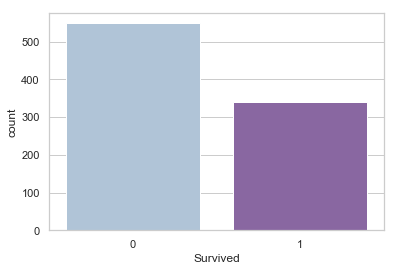

In [169]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='BuPu')

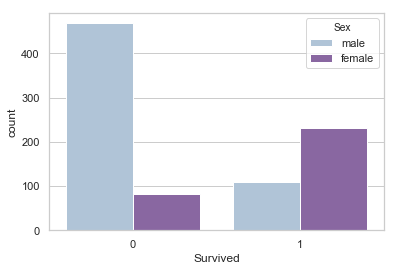

In [170]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='BuPu')

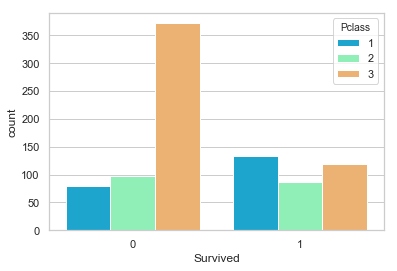

In [171]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

C:\Users\Dev\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


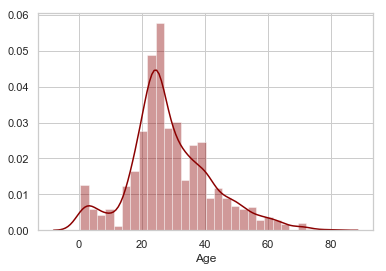

In [172]:
sns.distplot(train['Age'].dropna(),color='darkred',bins=30)

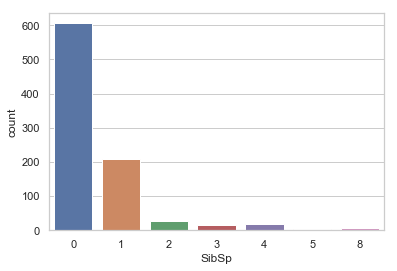

In [173]:
sns.countplot(x='SibSp',data=train)

In [174]:
# Convert Catogrical Feat.

In [175]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embk = pd.get_dummies(train['Embarked'],drop_first=True)

In [176]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [177]:
train = pd.concat([train,sex,embk],axis=1)

In [178]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [179]:
#Logistic Regression


In [180]:
from sklearn.model_selection import train_test_split

In [181]:
from sklearn.linear_model import LogisticRegression

In [182]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'], test_size=0.30,random_state=101)

In [183]:
lm = LogisticRegression()

In [184]:
lm.fit(X_train,y_train)

C:\Users\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [185]:
predictions = lm.predict(X_test)

In [186]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [187]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [188]:
print(confusion_matrix(y_test,predictions))

[[151  12]
 [ 36  68]]


In [189]:
print(accuracy_score(y_test,predictions))

0.8202247191011236
